In [11]:
import math
import os
from datetime import datetime

import keras
import keras.backend as K
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.callbacks import CSVLogger
from tensorflow.python.keras.layers import LSTM, Dense, Embedding, BatchNormalization, TimeDistributed, GRU
from tensorflow.python.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from metrics import f1, f1_loss

In [3]:
tf.keras.utils.get_custom_objects()['f1'] = f1
tf.keras.utils.get_custom_objects()['f1_loss'] = f1_loss

def extract_weights(name, model):
    """Extract weights from a neural network model"""
    
    # Extract weights
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    
    # Normalize
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

In [4]:
import sys
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt

# Set shell to show all lines of output
InteractiveShell.ast_node_interactivity = 'all'
InteractiveShell.ast_node_interactivity = 'last'


BASE_FOLDER= "../results"

def load_model(model_folder):
    model_folder = "{}/{}/model".format(BASE_FOLDER, model_folder)
    model = keras.models.load_model(model_folder)
    return model

def get_layer_weigths(model, layer_name = "embedding"):
    weight_layer = model.get_layer(layer_name)
    weights = weight_layer.get_weights()[0]
    # Normalize
    # print(np.linalg.norm(weights, axis = 1).reshape((-1, 1)))
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    weights = np.nan_to_num(weights)
    return weights
    

def reduce_dim(weights, components = 3, method = 'tsne'):
    """Reduce dimensions of embeddings"""
    if method == 'tsne':
        return TSNE(components, metric = 'cosine').fit_transform(weights)
#     elif method == 'umap':
#         # Might want to try different parameters for UMAP
#         return UMAP(n_components=components, metric = 'cosine', 
#                     init = 'random', n_neighbors = 5).fit_transform(weights)    

def plot_embeddings(reduction, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    x = reduction[:, 0]
    y = reduction[:, 1]
    plt.figure(figsize = (10, 8))
    for word_idx, word in enumerate(words):
        x, y = reduction[word_idx]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('Crops Embeddings Visualized with TSNE');
    plt.show()

# def plot_model_embeddings(model_folder):
    

In [5]:
# load crop list
crop_codes = '/media/data/projects/crophisto/crop_codes.csv'

# load crop info
df_crops = pd.read_csv(crop_codes, sep=";")
# transform data to get a line per each
crop_list = df_crops["code"].to_numpy()

crop_names = df_crops["description"].tolist()
crop_names = crop_names[:-1]
crop_names

['TRIGO',
 'URBANO-VIALES',
 'MAIZ',
 'CEBADA',
 'OTROS CEREALES',
 'ROQUEDOS',
 'SUELO DESNUDO',
 'GIRASOL',
 'COLZA',
 'OTRAS LEGUMINOSAS GRANO',
 'GUISANTES',
 'ALFALFA',
 'FORRAJERAS',
 'OTROS CULTIVOS INDUSTRIALES',
 'REMOLACHA',
 'PATATAS',
 'VIÑEDO',
 'OLIVAR',
 'HORTICOLA',
 'AROMATICAS',
 'FRUTALES',
 'FRUTALES CASCARA',
 'PASTIZAL',
 'MATORRAL',
 'CONIFERAS',
 'FRONDOSAS CADUCIFOLIAS',
 'FRONDOSAS SIEMPRE VERDES',
 'LAMINA AGUA']

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 20)             540       
_________________________________________________________________
dropout (Dropout)            (None, 8, 20)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               283648    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 27)                6939      
Total params: 292,151
Trainable params: 291,639
Non-trainable params: 512
________________________________________________

IndexError: index 27 is out of bounds for axis 0 with size 27

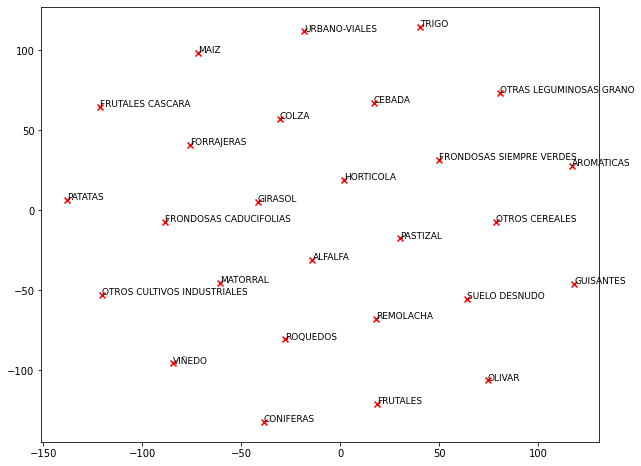

In [12]:
model = tf.python.keras.models.load_model('/home/gus/workspaces/wpy/IACapstone/results/batchnorm/20200808_075240_emb_dropout/model')

print(model.summary())
weights = get_layer_weigths(model, layer_name = "embedding")
crops_r = reduce_dim(weights, components = 2, method = 'tsne')
plot_embeddings(crops_r, crop_names)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 10)             280       
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                19200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1820      
Total params: 21,556
Trainable params: 21,428
Non-trainable params: 128
_________________________________________________________________
None


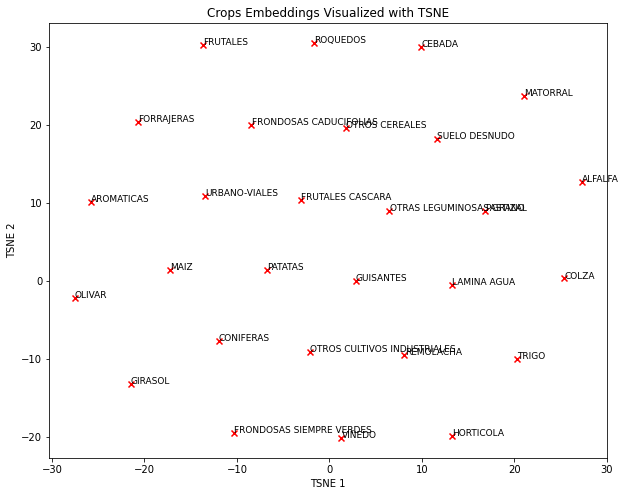

In [28]:
model = load_model('20200717_225027_lstm_64_depth_10')
print(model.summary())
weights = get_layer_weigths(model, layer_name = "embedding_1")
crops_r = reduce_dim(weights, components = 2, method = 'tsne')
plot_embeddings(crops_r, crop_names)